First few rows of the dataset:
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  

Summary statistics of the dataset:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000    

C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


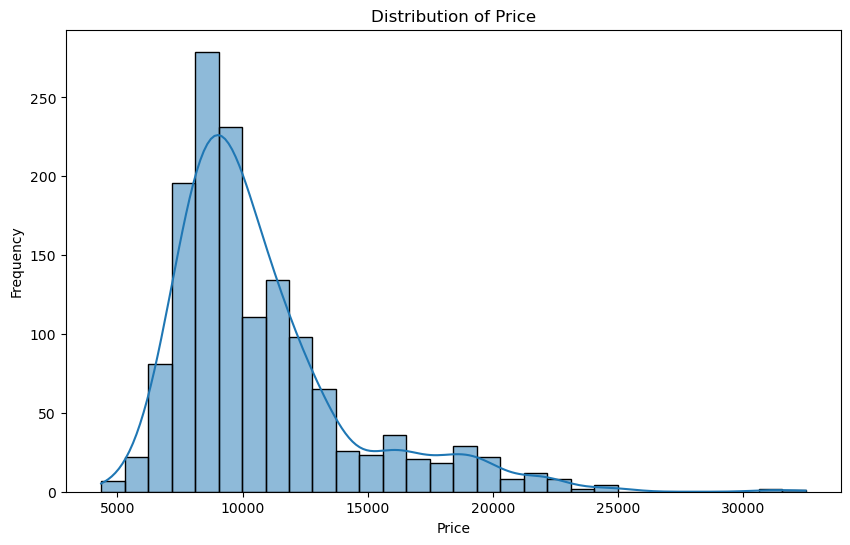

C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

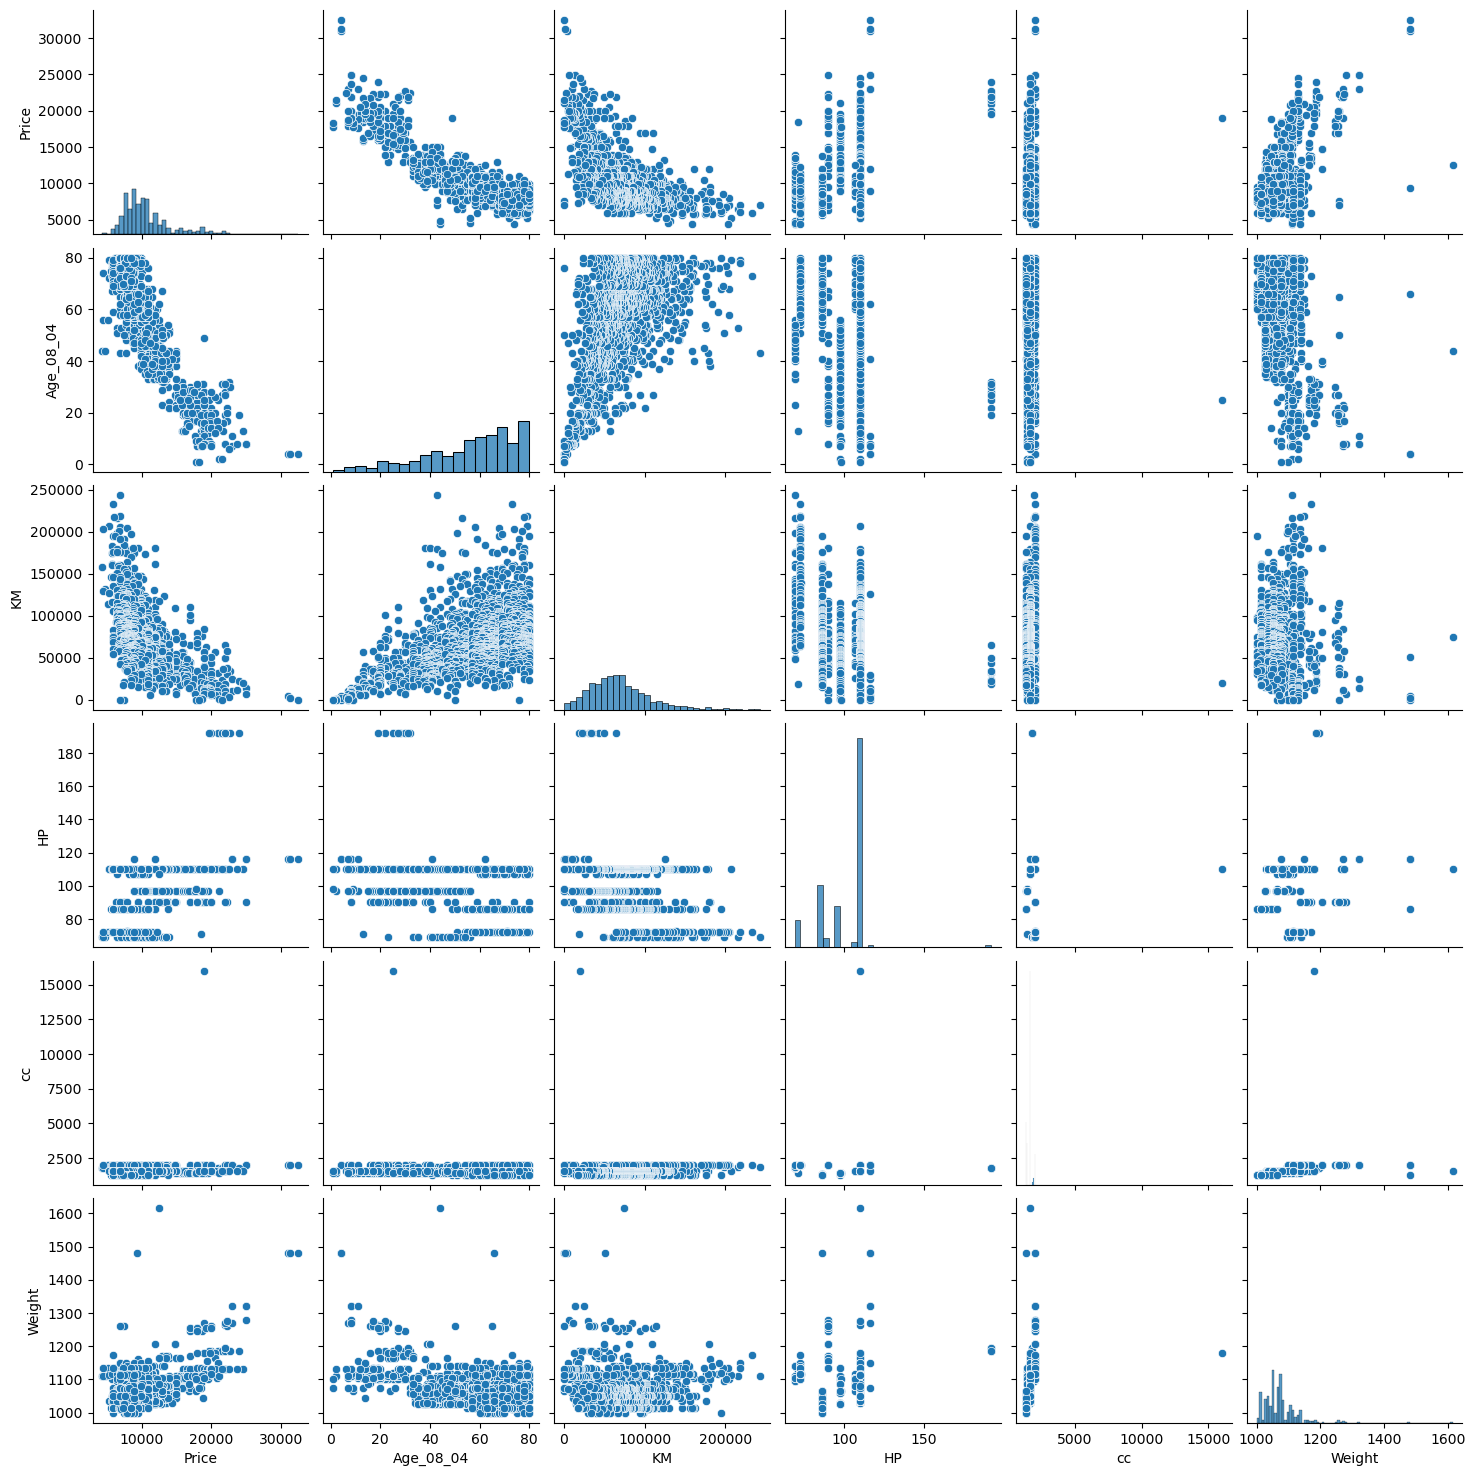

C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


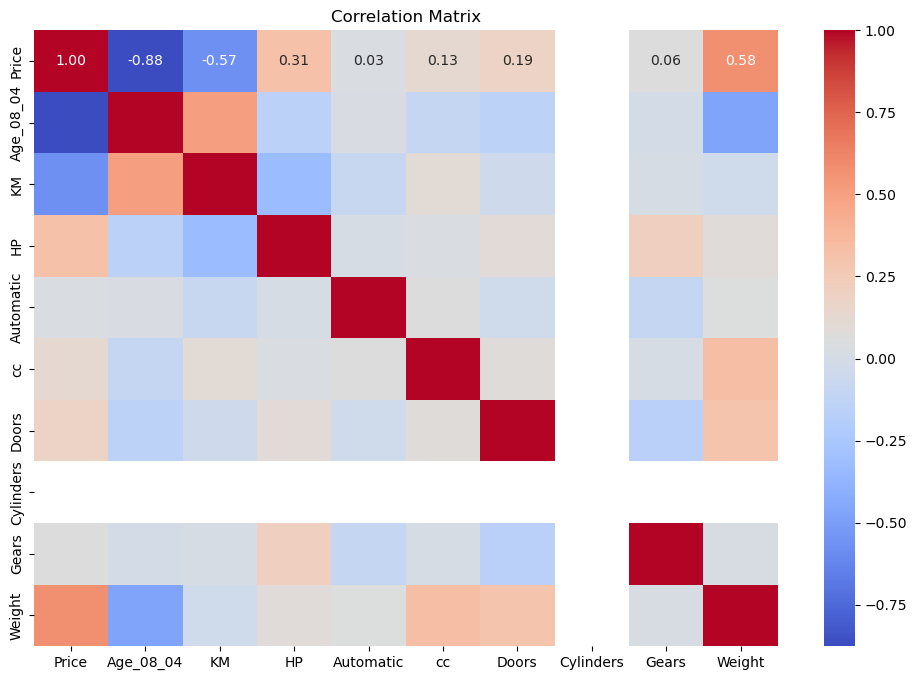

Non-numeric columns after conversion:
Index([], dtype='object')

MLR Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1128.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:38:51   Log-Likelihood:                -12377.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv('ToyotaCorolla - MLR.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())

# Display summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Visualizations
# Distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Pairplot to see relationships between a few variables
selected_features = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']
sns.pairplot(df[selected_features])
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64' ])  # Select only numeric columns

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Convert non-numeric columns to numeric if possible
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            df = df.drop(column, axis=1)

# Check if there are still non-numeric columns
print("Non-numeric columns after conversion:")
print(df.select_dtypes(exclude=['float64', 'int64']).columns)

# Continue with MLR fitting
# Prepare features and target variable for MLR
X = df.drop('Price', axis=1)
y = df['Price']

# Adding a constant column for the intercept term in MLR
X = sm.add_constant(X)

# Fit the multiple linear regression model
mlr_model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print("\nMLR Model Summary:")
print(mlr_model.summary())


# Preprocessing
# Convert categorical variables into dummy/indicator variables
df_processed = pd.get_dummies(df, drop_first=True)

# Standardize the features (optional but recommended for regression)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight']  # Adjust based on dataset columns
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

print("Processed dataset:")
print(df_processed.head())

# Prepare features and target variable for MLR
X = df_processed.drop('Price', axis=1)
y = df_processed['Price']

# Adding a constant column for the intercept term in MLR
import statsmodels.api as sm

X = sm.add_constant(X)

# Fit the multiple linear regression model
mlr_model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print("\nMLR Model Summary:")
print(mlr_model.summary())


In [33]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df_processed.drop('Price', axis=1)
y = df_processed['Price']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1148, 9)
Shape of X_test: (288, 9)
Shape of y_train: (1148,)
Shape of y_test: (288,)


In [35]:
import statsmodels.api as sm

# Adding a constant column for the intercept term in MLR
X_train = sm.add_constant(X_train)

# Fit the multiple linear regression model using training data
mlr_model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
print("MLR Model Summary:")
print(mlr_model.summary())


MLR Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     919.3
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:47:01   Log-Likelihood:                -9882.2
No. Observations:                1148   AIC:                         1.978e+04
Df Residuals:                    1139   BIC:                         1.983e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04  -2245.7826     54.294 

In [37]:
# Fit the multiple linear regression model without regularization
mlr_model1 = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
print("Model 1 - Multiple Linear Regression without Regularization:")
print(mlr_model1.summary())


Model 1 - Multiple Linear Regression without Regularization:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     919.3
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:48:01   Log-Likelihood:                -9882.2
No. Observations:                1148   AIC:                         1.978e+04
Df Residuals:                    1139   BIC:                         1.983e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [39]:
from sklearn.linear_model import Lasso

# Fit the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha if necessary
lasso_model.fit(X_train, y_train)

# Print the coefficients
print("Model 2 - Lasso Regression Coefficients:")
print(pd.Series(lasso_model.coef_, index=X_train.columns))


Model 2 - Lasso Regression Coefficients:
Age_08_04   -2245.698855
KM           -749.331032
HP            410.836248
Automatic     368.968099
cc            -48.001346
Doors           7.311791
Cylinders       0.000000
Gears         623.326844
Weight       1044.175638
dtype: float64


In [43]:
from sklearn.linear_model import Ridge

# Select a subset of features
selected_features = ['Age_08_04', 'KM', 'Weight']  # Adjust as necessary

# Prepare the training data with selected features
X_train_subset = X_train[selected_features]

# Fit the Ridge regression model
ridge_model = Ridge(alpha=0.1)  # Adjust alpha if necessary
ridge_model.fit(X_train_subset, y_train)

# Print the coefficients
print("Model 3 - Ridge Regression Coefficients:")
print(pd.Series(ridge_model.coef_, index=selected_features))


Model 3 - Ridge Regression Coefficients:
Age_08_04   -2193.162818
KM           -922.977615
Weight       1086.527933
dtype: float64


In [45]:
# Predict on the testing data
y_pred1 = mlr_model1.predict(sm.add_constant(X_test))

# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test, y_pred1)

print("Model 1 Evaluation Metrics:")
print("MAE:", mae1)
print("MSE:", mse1)
print("RMSE:", rmse1)
print("R-squared:", r2_1)


Model 1 Evaluation Metrics:
MAE: 997.0024057258137
MSE: 1970126.6288130304
RMSE: 1403.6119936838065
R-squared: 0.8523452141908853


In [47]:
# Predict on the testing data
y_pred2 = lasso_model.predict(X_test)

# Calculate evaluation metrics
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, y_pred2)

print("Model 2 Evaluation Metrics (Lasso Regression):")
print("MAE:", mae2)
print("MSE:", mse2)
print("RMSE:", rmse2)
print("R-squared:", r2_2)


Model 2 Evaluation Metrics (Lasso Regression):
MAE: 996.9788432635409
MSE: 1970123.2063312754
RMSE: 1403.6107745138163
R-squared: 0.8523454706951136


In [49]:
# Predict on the testing data
X_test_subset = X_test[selected_features]
y_pred3 = ridge_model.predict(X_test_subset)

# Calculate evaluation metrics
mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_test, y_pred3)

print("Model 3 Evaluation Metrics (Ridge Regression):")
print("MAE:", mae3)
print("MSE:", mse3)
print("RMSE:", rmse3)
print("R-squared:", r2_3)


Model 3 Evaluation Metrics (Ridge Regression):
MAE: 1020.5861404840421
MSE: 2234964.5793858063
RMSE: 1494.9797923001522
R-squared: 0.8324964439169116


In [51]:
from sklearn.linear_model import Lasso

# Create and fit the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Adjust the regularization strength (alpha) as needed
lasso_model.fit(X_train, y_train)

# Print the coefficients
print("Lasso Regression Coefficients:")
print(pd.Series(lasso_model.coef_, index=X_train.columns))


Lasso Regression Coefficients:
Age_08_04   -2245.698855
KM           -749.331032
HP            410.836248
Automatic     368.968099
cc            -48.001346
Doors           7.311791
Cylinders       0.000000
Gears         623.326844
Weight       1044.175638
dtype: float64


In [53]:
from sklearn.linear_model import Ridge

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=0.1)  # Adjust the regularization strength (alpha) as needed
ridge_model.fit(X_train, y_train)

# Print the coefficients
print("Ridge Regression Coefficients:")
print(pd.Series(ridge_model.coef_, index=X_train.columns))


Ridge Regression Coefficients:
Age_08_04   -2245.526347
KM           -749.419080
HP            410.820174
Automatic     370.361416
cc            -48.117313
Doors           7.491746
Cylinders       0.000000
Gears         624.836996
Weight       1044.239912
dtype: float64
